# Welcome



In [6]:
%%writefile code/introtools.py
import tutorial as tut
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline


In [2]:
tut.example('Gender Shades')

[Gender Shades](http://gendershades.org/)

In [3]:
tut.example('Compas')

[Compas](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

## What is Machine Learning?


In [7]:
# %%writefile code/load_iris.py
iris_df = tut.load_iris_df()
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


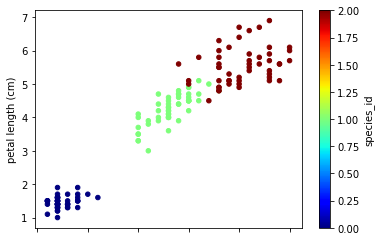

In [8]:
# %load code/plot_iris
iris_df.plot.scatter('petal width (cm)','petal length (cm)',c='species_id',colormap='jet')


Text(3.8,4.5,'setosa')

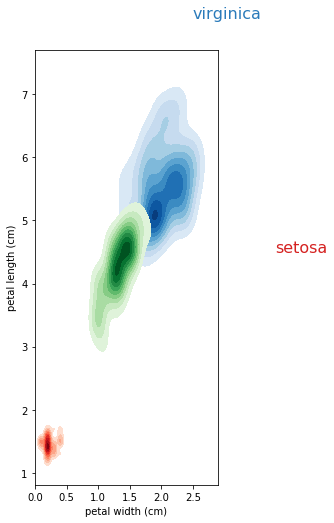

In [9]:
%%writefile
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
setosa = iris_df[iris_df['species']=='setosa']
virginica= iris_df[iris_df['species']=='virginica']
versicolor = iris_df[iris_df['species']=='versicolor']

# Draw the two density plots
ax = sns.kdeplot(setosa['petal width (cm)'], setosa['petal length (cm)'],
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica['petal width (cm)'], virginica['petal length (cm)'],
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor['petal width (cm)'], versicolor['petal length (cm)'],
                 cmap="Greens", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

/home/smb/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(-0.05500000000000001, 4.47575, -0.05500000000000001, 1.39505)

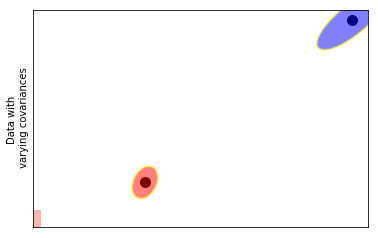

In [16]:
label_col = 'species'
data_cols = ['petal length (cm)','petal width (cm)']
X = iris_df[data_cols].values
y = iris_df[label_col].values
# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
splot = tut.plot_data(qda, X, y, y_pred, fig_index=3)
tut.plot_qda_cov(qda, splot)
plt.axis('tight')

In [20]:
qda.means_

array([[1.464, 0.244],
       [4.26 , 1.326],
       [5.552, 2.026]])

In [22]:
qda.covariance_

[array([[0.03010612, 0.00569796],
        [0.00569796, 0.01149388]]), array([[0.22081633, 0.07310204],
        [0.07310204, 0.03910612]]), array([[0.30458776, 0.04882449],
        [0.04882449, 0.07543265]])]

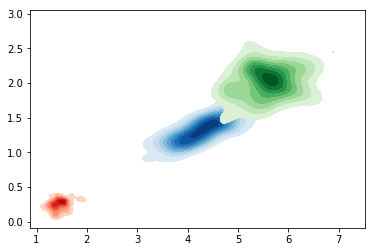

In [29]:
for mu,cov,color in zip(qda.means_,qda.covariance_,["Reds","Blues","Greens"]):
    x = np.random.multivariate_normal(mu,cov,size=100)
    ax = sns.kdeplot(x[:,0], x[:,1],
                 cmap=color, shade=True, shade_lowest=False)

In [9]:
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor